<a href="https://colab.research.google.com/github/Aqillaaprly/rakamin_homework/blob/main/Aqilla_Aprily_Kurnia_Sari_DS_59_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aqilla Aprily Kurnia Sari
## Data Science 59

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/rakamin/youtube_statistics.xlsx')

In [ ]:

print("Data shape:", df.shape)

Data shape: (36791, 25)


In [ ]:

print("Informasi Dataset:", df.info)

Informasi Dataset: <bound method DataFrame.info of       trending_date                                              title  \
0        2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1        2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2        2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3        2017-11-14                     Eruma Saani | Tamil vs English   
4        2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   
...             ...                                                ...   
36786    2018-06-14  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...   
36787    2018-06-14                         Seetha | Flowers | Ep# 364   
36788    2018-06-14  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   
36789    2018-06-14  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...   
36790    2018-06-14  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   

            channel_title  category_id        publish_time  

In [ ]:
print("Kolom yang tersedia:\n", df.columns)

Kolom yang tersedia:
 Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'No_tags', 'desc_len', 'len_title', 'publish_date',
       'trending_lag', 'publish_day_of_week_Monday',
       'publish_day_of_week_Saturday', 'publish_day_of_week_Sunday',
       'publish_day_of_week_Thursday', 'publish_day_of_week_Tuesday',
       'publish_day_of_week_Wednesday'],
      dtype='object')


In [ ]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                       trending_date   category_id  \
count                          36791  36791.000000   
mean   2018-02-26 13:30:23.630779392     21.552173   
min              2017-11-14 00:00:00      1.000000   
25%              2018-01-02 00:00:00     23.000000   
50%              2018-02-25 00:00:00     24.000000   
75%              2018-04-24 00:00:00     24.000000   
max              2018-06-14 00:00:00     43.000000   
std                              NaN      6.586716   

                        publish_time         views         likes  \
count                          36791  3.679100e+04  3.679100e+04   
mean   2025-10-11 11:05:38.040009984  1.071490e+06  2.745069e+04   
min              2025-10-11 00:00:00  4.024000e+03  0.000000e+00   
25%              2025-10-11 06:48:28  1.256040e+05  8.790000e+02   
50%              2025-10-11 11:29:32  3.078360e+05  3.126000e+03   
75%              2025-10-11 14:50:07  8.066315e+05  1.409500e+04   
max           

In [ ]:
print("Cek missing values:\n", df.isnull().sum())

Cek missing values:
 trending_date                    0
title                            0
channel_title                    0
category_id                      0
publish_time                     0
tags                             0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
video_error_or_removed           0
description                      0
No_tags                          0
desc_len                         0
len_title                        0
publish_date                     0
trending_lag                     0
publish_day_of_week_Monday       0
publish_day_of_week_Saturday     0
publish_day_of_week_Sunday       0
publish_day_of_week_Thursday     0
publish_day_of_week_Tuesday      0
publish_day_of_week_Wednesday    0
dtype: int64


# 1. Lakukan EDA dan preprocessing sederhana

In [ ]:
df['description'] = df['description'].fillna('')

In [ ]:
# Konversi data type tanggal
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

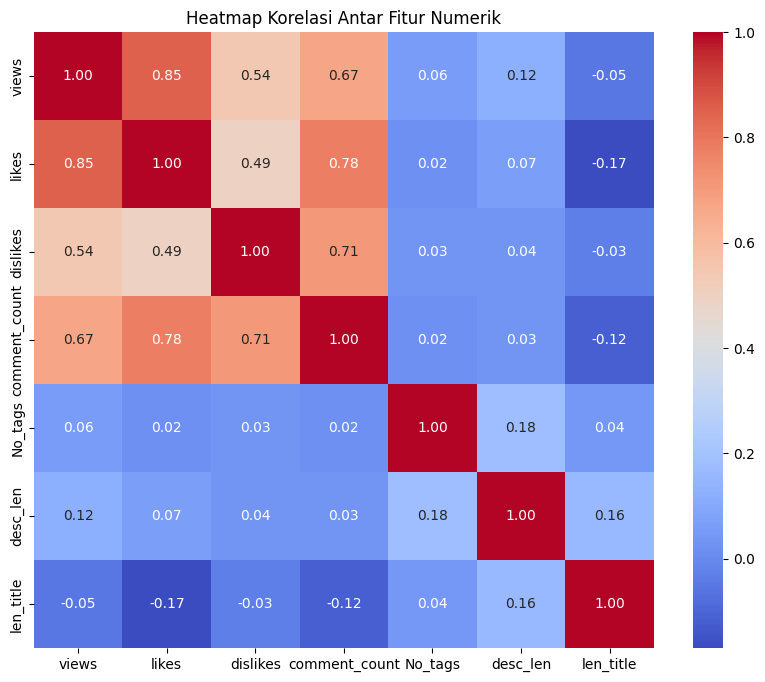

In [ ]:
# Visualisasi untuk EDA
numeric_features = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

# 2. Lakukan Feature Engineeering

In [ ]:
# Menghitung 'trending_lag'
df.dropna(subset=['publish_date', 'trending_date'], inplace=True)
df['trending_lag'] = (df['trending_date'] - df['publish_date']).dt.days

# Fitur hari publish
df['publish_day_of_week'] = df['publish_date'].dt.day_name()

# Mengubah fitur kategorikal dan boolean menjadi numerik
# One-hot encoding untuk hari publish
df = pd.get_dummies(df, columns=['publish_day_of_week'], drop_first=True)

# Konversi boolean ke integer (0 atau 1)
df['comments_disabled'] = df['comments_disabled'].astype(int)
df['ratings_disabled'] = df['ratings_disabled'].astype(int)

print("\nDataset setelah Feature Engineering:")
df.head()


Dataset setelah Feature Engineering:


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,publish_day_of_week_Sunday,publish_day_of_week_Thursday,publish_day_of_week_Tuesday,publish_day_of_week_Wednesday,publish_day_of_week_Monday,publish_day_of_week_Saturday,publish_day_of_week_Sunday,publish_day_of_week_Thursday,publish_day_of_week_Tuesday,publish_day_of_week_Wednesday
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2025-10-11 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,True,False,False,False,False,False,True,False,False,False
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2025-10-11 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,False,False,False,True,False,False,False,False,False
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2025-10-11 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,True,False,False,False,False,False,True,False,False,False
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2025-10-11 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,True,False,False,False,False,False,True,False,False,False
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2025-10-11 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,False,False,False,True,False,False,False,False,False


# 3. Training Model dan Prediksi Views

In [ ]:
features_to_use = [
    'likes', 'dislikes', 'comment_count',
    'comments_disabled', 'ratings_disabled',
    'trending_lag', 'publish_day_of_week_Monday', 'publish_day_of_week_Saturday',
    'publish_day_of_week_Sunday', 'publish_day_of_week_Thursday',
    'publish_day_of_week_Tuesday', 'publish_day_of_week_Wednesday'
]
X = df[features_to_use]
y = df['views']

# Split data jadi beberapa set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:

# 2. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Tuning Hyperparameter
print("\nMemulai Tuning Hyperparameter untuk Random Forest...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)


Memulai Tuning Hyperparameter untuk Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [ ]:
# Model terbaik dari hasil tuning
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(f"\nHyperparameter terbaik: {grid_search.best_params_}")


Hyperparameter terbaik: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


# 4. Evaluasi Model

In [ ]:
# Fungsi untuk menghitung dan menampilkan hasil evaluasi
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"--- Hasil Evaluasi untuk {model_name} ---")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R2 Score: {r2:.4f}\n")

# Evaluasi semua model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest (Default)")
evaluate_model(y_test, y_pred_best_rf, "Random Forest (Tuned)")

--- Hasil Evaluasi untuk Linear Regression ---
RMSE: 1,601,853.71
R2 Score: 0.6971

--- Hasil Evaluasi untuk Random Forest (Default) ---
RMSE: 814,416.75
R2 Score: 0.9217

--- Hasil Evaluasi untuk Random Forest (Tuned) ---
RMSE: 813,815.78
R2 Score: 0.9218

